In [1]:
import pandas as pd
import numpy as np


import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class NeuralNetwork(nn.Module):
    
    def __init__(self, layer_sizes, activation=F.relu):
        super(NeuralNetwork, self).__init__()
        self.linears = nn.ModuleList(
            [nn.Linear(v, layer_sizes[i+1]) for i, v in enumerate(layer_sizes[:-1])]
        )
        self.activation = activation
        
    def forward(self, x):
        for l in self.linears[:-1]:
            x = self.activation(l(x))

        x = self.linears[-1](x)
        x = F.sigmoid(x)
            
        return x

In [3]:
X = torch.Tensor([[0, 0], [0, 1], [1, 0], [1, 1]])
y = torch.Tensor([0, 1, 1, 0]).reshape(-1, 1)

In [4]:
class XORDataset(Dataset):

    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.X[index].to(device), self.y[index].to(device)

In [5]:
xor_data = XORDataset(X, y)
xor_dataloader = DataLoader(xor_data, batch_size=4, shuffle=True)

Final loss = 0.002303487155586481


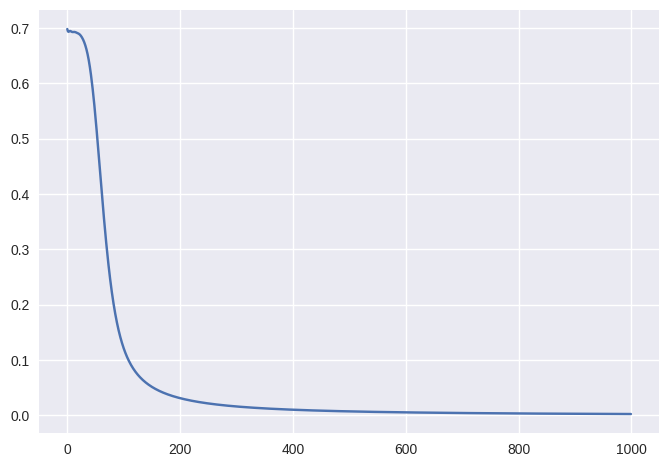

In [6]:
LEARNING_RATE = 0.05
NUM_EPOCHS = 1000

layers = [2, 2, 1]
xor = NeuralNetwork(layers, activation=F.sigmoid).to(device)
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.Adam(xor.parameters(), lr=LEARNING_RATE)
losses = []

for epoch in range(NUM_EPOCHS):

    for batch_inputs, batch_labels in xor_dataloader:
    
        optimizer.zero_grad()
        outputs = xor(batch_inputs)
        loss = criterion(outputs, batch_labels)
        
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())

    # print(f"Finished epoch {epoch+1} / {NUM_EPOCHS}")
    

print(f"Final loss = {losses[-1]}")
plt.plot(range(NUM_EPOCHS), losses)
plt.show()

In [7]:
preds = xor(X.to(device))
print(preds)

tensor([[0.0025],
        [0.9974],
        [0.9981],
        [0.0023]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [15]:
params = dict(xor.named_parameters())

In [39]:
Xd = X.to(device)
l1_out = Xd @ params['linears.0.weight'].t() + params['linears.0.bias']
l1_act = F.relu(l1_out)
l2_out = l1_act @ params['linears.1.weight'].t() + params['linears.1.bias']
l2_act = F.sigmoid(l2_out)

print(l2_act)

tensor([[0.0020],
        [1.0000],
        [1.0000],
        [0.0020]], device='cuda:0', grad_fn=<SigmoidBackward0>)


In [31]:
for k,v  in params.items():
    print(k, v)

linears.0.weight Parameter containing:
tensor([[-9.5977,  9.0014],
        [ 8.8874, -9.1968]], device='cuda:0', requires_grad=True)
linears.0.bias Parameter containing:
tensor([-4.6836, -4.8442], device='cuda:0', requires_grad=True)
linears.1.weight Parameter containing:
tensor([[12.3393, 12.7158]], device='cuda:0', requires_grad=True)
linears.1.bias Parameter containing:
tensor([-6.2082], device='cuda:0', requires_grad=True)
